Dans cette partie de datavisualisation, nous verrons la description des jeux, L'évolutions des ventes de chaque de la franchise de 1997 à 2023. mettrons en évidence les notes mis par les joueurs pour chaque jeu, ainsi que l'évolution du nombre de votants à 2014.

Pourrons-nous établir des corrélations entre-elles ?


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as ff
from plotly.offline import init_notebook_mode,iplot
import plotly as py
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GTA_officiel_concatened.csv to GTA_officiel_concatened.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GTA_Ventes_97_à_2023.csv to GTA_Ventes_97_à_2023.csv


In [ ]:
df = pd.read_csv('GTA_officiel_concatened.csv')

In [ ]:
df.drop(columns=['Unnamed: 0', 'link','Console','Publisher','Genre_x','NA_Sales',	'EU_Sales','JP_Sales','Other_Sales','Global_Sales'], inplace=True)

In [ ]:
df2= pd.read_csv('GTA_Ventes_97_à_2023.csv')

Dans le graphique en ligne ci-dessous, nous visualisons que pour chaque jeux sauf GTA V, le cumul des ventes de 1997 à 2023 reste linéaire. Le pic pour chacun de ces jeux représente le nombre d'unité vendu en millions, lors de sa sortie pour ensuite ne pas continuer à ce vendre. Ce qui paraît logique pour un jeu ordinaire, pour lequel on fini le jeu et on ne le ré-achete pas. Ne sont pas compris de ces chiffres le marché de l'occasion.

Cepandant GTA V, ne poursuit pas cette logique, car même aprés sa sortie en 2014, celui-ci continue de se vendre encore 10 ans plus tard. Le commerce de ce jeu représente 32 millions d'unités vendus en 2014 à 160 environs selon les sources en 2023 et continue de s'accroître.

La Franchise Grand Theft Auto, bat des records, car c'est la deuxième franchise la plus vendus dans le monde juste après Minecraft.

In [ ]:
fig = px.line(df2, x="Year_Global_Sales", y="Global_Sales", color="Name",
              title="Évolution des ventes de jeux vidéo par année")

# Affichage du graphique
fig.show()

La figure ci-dessous, montre de manière général que le nombre de votants évolue de manière croissante au fil des années. On peut penser que la démocratisation de l'accès à internet a engendré ce résultat.

Cependant on constate, que pour GTA Chinatown Wars le nombre de votant est plus petit que GTA San Andreas sortie 5 ans auparavant.

GTA V est véritablement au dessus de tout les jeux avec 400k de nombre de votants

In [ ]:
jeux_gta = {
    "Grand Theft Auto": {"Année de sortie": 1997, "Nb_Votant": 6182},
    "Grand Theft Auto 2": {"Année de sortie": 1999, "Nb_Votant": 3770},
    "Grand Theft Auto III": {"Année de sortie": 2001, "Nb_Votant": 24630},
    "Grand Theft Auto IV": {"Année de sortie": 2008, "Nb_Votant": 114834},
    "Grand Theft Auto V": {"Année de sortie": 2013, "Nb_Votant": 415000},
    "Grand Theft Auto: Chinatown Wars": {"Année de sortie": 2009, "Nb_Votant": 5358},
    "Grand Theft Auto: San Andreas": {"Année de sortie": 2004, "Nb_Votant": 123624},
    "Grand Theft Auto: Vice City": {"Année de sortie": 2002, "Nb_Votant": 49276}
}


In [ ]:
df_note = df.groupby(['Nom']).agg(
    {'Nb_note_1': 'sum', 'Nb_note_2': 'sum', 'Nb_note_3': 'sum',
     'Nb_note_4': 'sum', 'Nb_note5_':'sum', 'Nb_note_6':'sum', 'Nb_note_7':'sum', 'Nb_note_8':'sum','Nb_note_9':'sum','Nb_note_10':'sum' }).reset_index().sort_values(by='Nom')

In [ ]:
liste1 = [30,48,98,190,504,1312,1814,1354,556,276]
liste2 =[12,13,57,121,338,861,1300,685,256,127]
liste3=[68,60,146,280,908,3000,7800,7800,3200,1368]
liste4=[2859,1458,1917,3000,6300,12600,25800,30000,16500,14400]
liste5=[15000,8000,9000,11000,19000,28500,56000,91500,80500,96500]
liste6=[22,32,80,214,448,984,1672,1370,380,156]
liste7=[1516,816,1128,1440,3124,7200,18800,36800,29200,23600]
liste8=[722,342,460,620,1532,3800,10800,15600,9200,6200]

def sommeDeListe(list, size):
    if (size == 0):
        return 0
    else:
        return list[size - 1] + sommeDeListe(list, size - 1)
total1 = sommeDeListe(liste1, len(liste1))

total2 = sommeDeListe(liste2, len(liste2))
total3 = sommeDeListe(liste3, len(liste3))
total4 = sommeDeListe(liste4, len(liste4))
total5 = sommeDeListe(liste5, len(liste5))
total6 = sommeDeListe(liste6, len(liste6))
total7 = sommeDeListe(liste7, len(liste7))
total8 = sommeDeListe(liste8, len(liste8))

Nb_de_votants_vals = [total1,total2,total3,total4,total5,total6,total7,total8]
df_note.insert(loc=len(df_note.columns), column= 'Nb_Votant', value= Nb_de_votants_vals)

Annee = [1997,1999,2001,2008,2013,2009,2004,2002]
df_note.insert(loc=len(df_note.columns), column= 'Année de sortie', value= Annee)



In [ ]:
fig = go.Figure()

for jeu, data in jeux_gta.items():
    fig.add_trace(go.Bar(x=[data["Année de sortie"]], y=[data["Nb_Votant"]],
                         name=f"{jeu} ({data['Année de sortie']})"))

# Ajout d'une ligne reliant les points
fig.add_trace(go.Scatter(x=[1997, 2014], y=[3091, 38278],
                         mode='lines+markers', name='Évolution'))

fig.update_layout(title='Évolution du nombre de votants de 1997 à 2014',
                  xaxis_title='Année de sortie', yaxis_title='Nb_Votant')

fig.show()

Grâce au Pie Chart suivants, nous constatons bien que chaque jeux n'ont pas toujours fait l'unanimité. Même si au cumul, la note moyenne est comprise entre 7 et 8 pour l'ensemble des jeux. GTA V et Chine Chinatown wars sort du lot, pas pour les même raison. GTA V ressort avec une majorité de note à 10 à 23% (best of the best) tandis que GTA Chinatown Wars ressort avec une note de 6 pour 18.4% des votants.


In [ ]:
import plotly.express as px

# Données des notes pour Grand Theft Auto
notes_gta = [30, 48, 98, 190, 504, 1312, 1814, 1354, 556, 276]

# Données des notes pour Grand Theft Auto 2
notes_gta2 = [12, 13, 57, 121, 338, 861, 1300, 685, 256, 127]

# Données des notes pour Grand Theft Auto III
notes_gta3 = [68, 60, 146, 280, 908, 3000, 7800, 7800, 3200, 1368]

# Données des notes pour Grand Theft Auto VI
notes_gta4 = [2859,	1458,	1917,	3000,	6300,	12600,	25800,	30000,	16500,	14400]

# Données des notes pour Grand Theft Auto V
notes_gta5 = [15000,	8000,	9000,	11000,	19000,	28500,	56000,	91500,	80500,	96500	]

# Données des notes pour Grand Theft Auto VI
notes_gtachina = [22,	32,	80,	214,	448,	984,	1672,	1370,	380,	156]

# Données des notes pour Grand Theft Auto VI
notes_gtasan = [1516,	816,	1128,	1440,	3124,	7200,	18800,	36800,	29200,	23600]

# Données des notes pour Grand Theft Auto VI
notes_gtavice = [722,	342,	460,	620,	1532,	3800,	10800,	15600,	9200,	6200]

# Étiquettes pour chaque note
etiquettes = ["Note 1", "Note 2", "Note 3", "Note 4", "Note 5", "Note 6", "Note 7", "Note 8", "Note 9", "Note 10"]

# Création du diagramme circulaire pour Grand Theft Auto
fig_gta = px.pie(values=notes_gta, names=etiquettes, title="Répartition des notes pour Grand Theft Auto",
                 color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto 2
fig_gta2 = px.pie(values=notes_gta2, names=etiquettes, title="Répartition des notes pour Grand Theft Auto 2",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gta3 = px.pie(values=notes_gta3, names=etiquettes, title="Répartition des notes pour Grand Theft Auto III",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gtachina = px.pie(values=notes_gtachina, names=etiquettes, title="Répartition des notes pour Grand Theft Auto Chinatown Wars",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gta4 = px.pie(values=notes_gta4, names=etiquettes, title="Répartition des notes pour Grand Theft Auto IV",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gta5 = px.pie(values=notes_gta5, names=etiquettes, title="Répartition des notes pour Grand Theft Auto V",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gtasan = px.pie(values=notes_gtasan, names=etiquettes, title="Répartition des notes pour Grand Theft Auto Sans Andreas",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Création du diagramme circulaire pour Grand Theft Auto III
fig_gtavice = px.pie(values=notes_gtavice, names=etiquettes, title="Répartition des notes pour Grand Theft Auto Vice City",
                  color_discrete_sequence=["#FF6961", "#77DD77", "#FDFD96", "#84B6F4", "#FDCAE1", "#CCE5FF",
                                      "#A3FFAC", "#FFCA99", "#EAFFC2", "#FF8097"])

# Affichage des  diagrammes côte à côte
fig_gta.show()
fig_gta2.show()
fig_gta3.show()
fig_gta4.show()
fig_gta5.show()
fig_gtachina.show()
fig_gtasan.show()
fig_gtavice.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GTA_Descriptions (2).csv to GTA_Descriptions (2).csv


Cette Heatmap de corrélation, nous permet de mettre en évidence une corrélation très forte entre les notations des joueurs et la moyenne des ventes.


In [ ]:
correlation_matrix = df.corr()

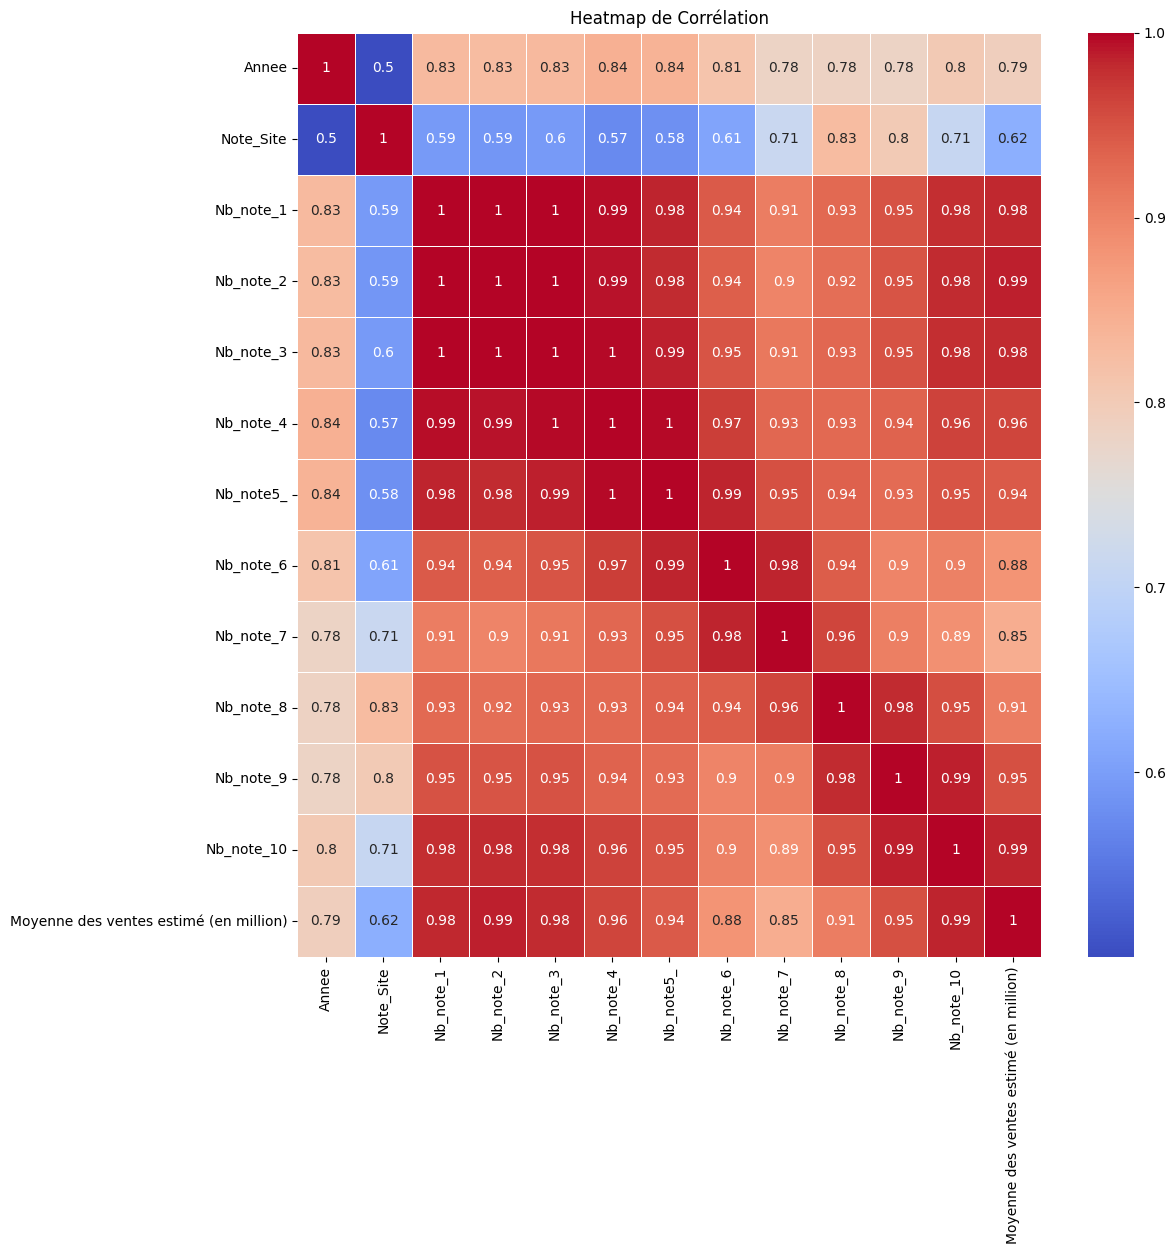

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de Corrélation")
plt.show()

In [ ]:
df3 = pd.read_csv('GTA_Descriptions (2).csv')

Avec ce graphique nous remarquons rapidement les différences entre les différents jeux en terme de taille de map, la durée de jeu possible, le nombre de missions et notamment le nombre de sound track disponlible dans le jeu.
On constate que GTA V et GTA San Andreas ont finalement qu'une seule différence dans ce graphique est la taille de la carte de jeu. (GTA SA: 36km2 versus GTA  V: 75.8 km2)

Grand Theft Auto V est le seul de la franchise à être multijoueur.

In [ ]:
df3['Musique'] = df3['Musique'].str.replace('pistes', "")

In [ ]:
df3['Dimensions'] = df3['Dimensions'].str.replace('D', "")

In [ ]:
df3['Dimensions'] = df3['Dimensions'].astype(int)

In [ ]:
df3['Musique'] = df3['Musique'].astype(int)

In [ ]:
fig_combined = px.bar(df3, x=df3["Nom du jeu"], y=[df3["Nb Heure"], df3["Nombre de missions"], df3["Taille de Map"], df3["Musique"]],
                      title="Caractéristiques des jeux Grand Theft Auto (GTA)",
                      color_discrete_sequence=["#B3E2CD", "#FDCDAC", "#CBD5E8","#E0BBe4"])

# Affichage du graphique combiné
fig_combined.show()

In [ ]:

df3['Vente'] = [2.32, 3.42, 18.5, 25, 160, 35.6, 27.5, 1]

Grâce à ce cercle de corrélation,nous constatons que la taille de la map et la durée de jeu et le nombre de missions ont une influence significative sur la variable cible qui est la vente.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
cat_df3 = df3.select_dtypes(include=['object'])
num_df3 = df3.select_dtypes(exclude=['object'])

In [ ]:
for i in cat_df3:
    print(str(i),':',df3[str(i)].unique())

Nom du jeu : ['Grand Theft Auto' 'Grand Theft Auto 2' 'Grand Theft Auto III'
 'Grand Theft Auto IV' 'Grand Theft Auto V ' 'Grand Theft Auto Vice City'
 'Grand Theft Auto San Andreas' 'Grand Theft Auto Chinatown Wars']
Mode de jeu : ['solo' 'solo et multijoueur' 'Solo']
Prise de vue : ['2D vue de dessus' '3D TPS']
Gameplay : ['combat conduite exploration' ' combat conduite exploration'
 'combat conduite exploration tir' 'combat conduite exploration tir vol']
 Nom des personnages : ['Claude' 'Niko Bellic' 'Michael De Santa Franklin Clinton Trevor Philips'
 'Tommy Vercetti' 'Carl Johnson' 'Huang Lee']
 Environnement : ['Urbain' 'Urbain rural']


In [ ]:
df3=df3.replace(['solo','solo et multijoueur', 'Solo'],[0,1,2])
df3=df3.replace(['2D vue de dessus','3D TPS'],[0,1])
df3=df3.replace(['combat conduite exploration','combat conduite exploration tir','combat conduite exploration tir vol',' combat conduite exploration'],[0,1,2,3])
df3=df3.replace(['Urbain','Urbain rural'],[0,1])

In [ ]:
Y = df3['Vente']

df3.drop(['Vente'], axis=1, inplace=True)

In [ ]:
 df3 = df3.drop(['Nom du jeu', ' Nom des personnages'], axis=1)

In [ ]:
sc=StandardScaler()

norm=sc.fit_transform(df3)

In [ ]:
acp = PCA()
acp_coord = acp.fit_transform(norm)

In [ ]:
print('Les valeurs propres sont :', acp.explained_variance_)

Les valeurs propres sont : [6.56376999e+00 2.56348592e+00 1.15104482e+00 6.45276740e-01
 3.30971495e-01 1.54578387e-01 1.94440804e-02 1.96770148e-32]


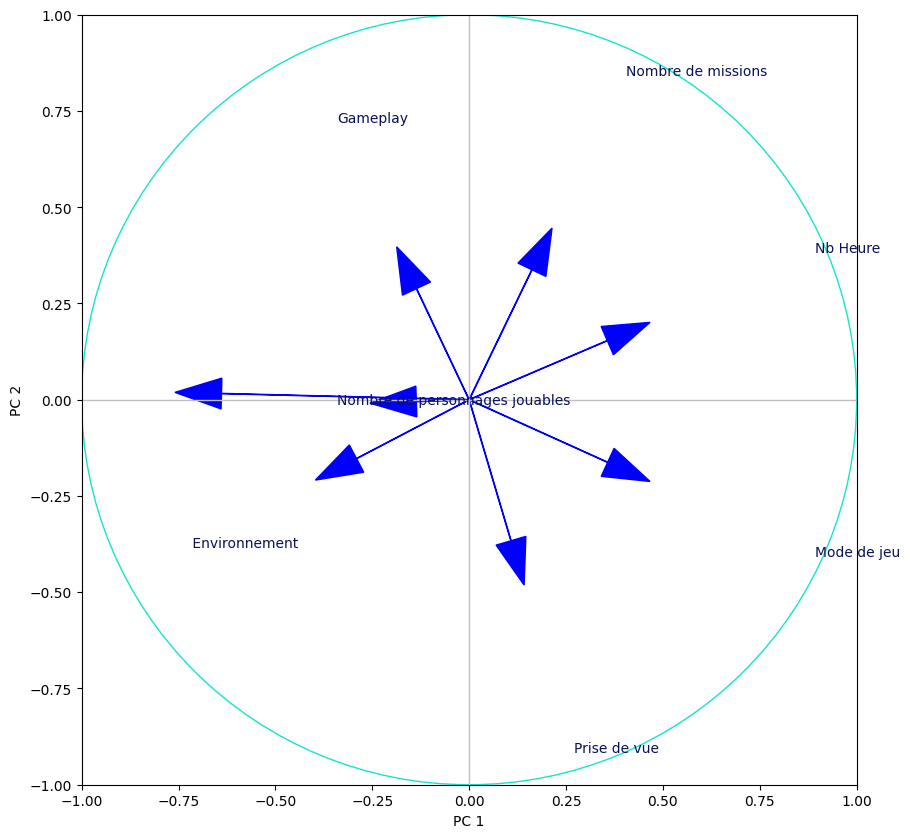

In [ ]:
racine_valeurs_propres = np.sqrt(acp.explained_variance_)
corvar = np.zeros((8, 8))
for k in range(8):
    corvar[:, k] = acp.components_[:, k] * racine_valeurs_propres[k]

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Affichage des variables
for j in range(8):
    plt.annotate(df3.columns[j], (corvar[j, 0], corvar[j, 1]), color="#091158")
    plt.arrow(
        0,
        0,
        corvar[j, 0] * 0.4,
        corvar[j, 1] * 0.4,
        alpha=1,
        head_width=0.08,
        color="b",
    )

# Ajout des axes
plt.plot([-1, 1], [0, 0], color="silver", linestyle="-", linewidth=1)
plt.plot([0, 0], [-1, 1], color="silver", linestyle="-", linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 1, color="#16E4CA", fill=False)
axes.add_artist(cercle)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()